# Importando las bibliotecas necesarias 

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import shapiro, mannwhitneyu, ttest_1samp, wilcoxon ,ttest_ind



# Sobre el Conjunto de Datos 'gym_members_exercise_tracking.csv' 

Este conjunto de datos proporciona una visión detallada de las rutinas de ejercicio, atributos físicos y métricas de fitness de los miembros de un gimnasio. Contiene 973 muestras de datos del gimnasio, incluyendo indicadores clave de rendimiento como la frecuencia cardíaca, calorías quemadas y duración del entrenamiento. Cada entrada también incluye datos demográficos y niveles de experiencia, lo que permite un análisis exhaustivo de los patrones de fitness, la progresión de los atletas y las tendencias de salud.

Características Clave:

- Age: Edad del miembro del gimnasio.
- Gender: Género del miembro del gimnasio (Male o Female).
- Weight (kg): Peso del miembro en kilogramos.
- Height (m): Altura del miembro en metros.
- Max_BPM: Frecuencia cardíaca máxima (latidos por minuto) durante las sesiones de entrenamiento.
- Avg_BPM: Frecuencia cardíaca promedio durante las sesiones de entrenamiento.
- Resting_BPM: Frecuencia cardíaca en reposo antes del entrenamiento.
- Session_Duration (hours): Duración de cada sesión de entrenamiento en horas.
- Calories_Burned: Total de calorías quemadas durante cada sesión.
- Workout_Type: Tipo de entrenamiento realizado (por ejemplo, Cardio, Strength, Yoga, HIIT).
- Fat_Percentage: Porcentaje de grasa corporal del miembro.
- Water_Intake (liters): Ingesta diaria de agua durante los entrenamientos.
- Workout_Frequency (days/week): Número de sesiones de entrenamiento por semana.
- Experience_Level: Nivel de experiencia, desde principiante (1) hasta experto (3).
- BMI: Índice de Masa Corporal, calculado a partir de la altura y el peso.

# Cargar el archivo CSV

In [131]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
# Mostrar las primeras filas del DataFrame
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [132]:
# Mostrar información sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Cantidad de miembros por género

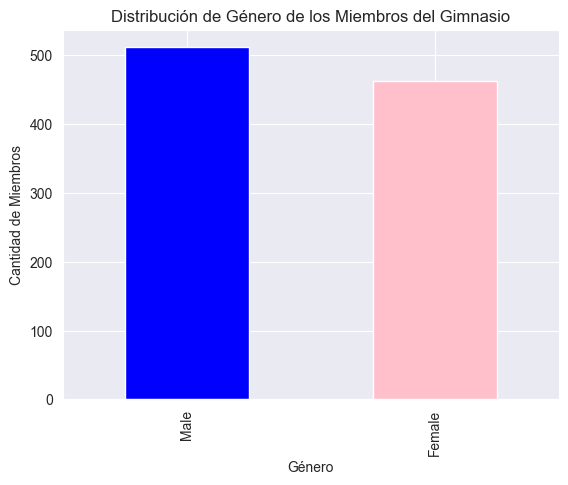

In [133]:
gender_counts = df['Gender'].value_counts()

# Generar el gráfico de barras
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de Género de los Miembros del Gimnasio')
plt.xlabel('Género')
plt.ylabel('Cantidad de Miembros')
plt.show()

# Proporción de cada género

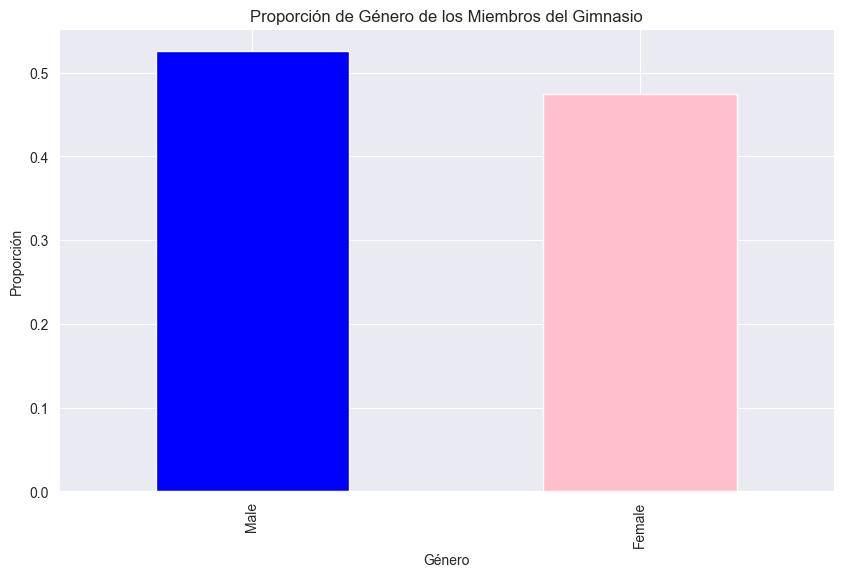

In [134]:
conteo_genero = df['Gender'].value_counts()

proporcion_genero = conteo_genero / len(df)

varianza_genero = np.var(proporcion_genero, ddof=1)

#Gráfico de barras para la proporción de género
plt.figure(figsize=(10, 6))
proporcion_genero.plot(kind='bar', color=['blue', 'pink'])
plt.title('Proporción de Género de los Miembros del Gimnasio')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.show()



# Análisis

La proporción de género indica que el gimnasio tiene una distribución equitativa de hombres y mujeres, con alrededor de un 50% de cada género. Sugiere que el gimnasio es igualmente atractivo para ambos géneros.


# Intervalo de confianza del 90% de la proporción de género

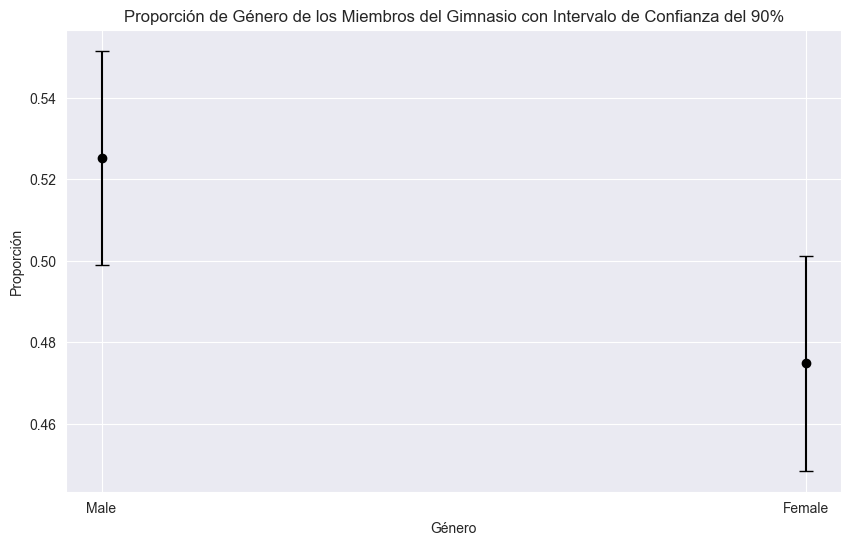

In [135]:
# Calcular el error estándar de la proporción
std_error = np.sqrt(proporcion_genero * (1 - proporcion_genero) / len(df))

# Calcular el intervalo de confianza del 90%
z_score = norm.ppf(0.95)
ci_lower = proporcion_genero - z_score * std_error
ci_upper = proporcion_genero + z_score * std_error

# Gráfico de puntos con barras de error para la proporción de género con intervalo de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(proporcion_genero.index, proporcion_genero,
             yerr=[proporcion_genero - ci_lower, ci_upper - proporcion_genero], fmt='o', capsize=5, color='black')
plt.title('Proporción de Género de los Miembros del Gimnasio con Intervalo de Confianza del 90%')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.grid(True)
plt.show()

# Creando variable 'Calorias quemadas por minuto'.

In [136]:
df['Calorías_Quemadas_por_Minuto'] = df['Calories_Burned'] / (df['Session_Duration (hours)'] * 60)

print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

# Estimacion de Parámetros del BMI

In [137]:
data = df['BMI']
# Estimador puntual de la media
media_bmi = np.mean(data)

# Estimador puntual de la varianza
varianza_bmi = np.var(data, ddof=1)

print(f'Estimador puntual de la media de BMI: {media_bmi}')
print(f'Estimador puntual de la varianza de BMI: {varianza_bmi}')

Estimador puntual de la media de BMI: 24.91212744090442
Estimador puntual de la varianza de BMI: 44.36731429649931


# Se puede afirmar que el 50% o más de las personas que van al gimnasio son menores de 40 años ?

H0 : p < 0.50
H1: p >= 0.50



In [138]:
# Filtrar las personas menores de 40 años
menores_40_df = df[df['Age'] < 40]

# Calcular los valores necesarios para verificar las condiciones
n = len(df)
p_techo = len(menores_40_df) / len(df)

# Verificar las condiciones
condicion_1 = n * p_techo >= 5
condicion_2 = n * (1 - p_techo) >= 5

if condicion_1 and condicion_2:
    print("Es válido realizar la prueba de hipótesis para proporciones.")
else:
    print("No es válido realizar la prueba de hipótesis para proporciones.")

p_techo = len(menores_40_df) / len(df)
n = len(df)
p0 = 0.50
resultado = stats.binomtest(len(menores_40_df), n, p0, alternative='greater')
alfa = 0.05

if resultado.pvalue < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que el 50% o más de las personas que van al gimnasio son menores de 40 años."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que el 50% o más de las personas que van al gimnasio son menores de 40 años."

print(f'Proporción de personas menores de 40 años: {p_techo}')
print(f'Valor p: {resultado.pvalue}')
print(conclusion)

Es válido realizar la prueba de hipótesis para proporciones.
Proporción de personas menores de 40 años: 0.4984583761562179
Valor p: 0.5510138670567714
No hay prueba suficiente para rechazar H0. No podemos concluir que el 50% o más de las personas que van al gimnasio son menores de 40 años.


# Análisis

La proporción observada de personas menores de 40 años en el gimnasio, aunque no estadísticamente significativa para concluir que es mayor o igual al 50%, refleja un equilibrio saludable y realista en la distribución de edades, lo cual es consistente con las tendencias y comportamientos observados en la vida real.

# Histograma superpuesto del BMI de las modalidades Yoga y Fuerza

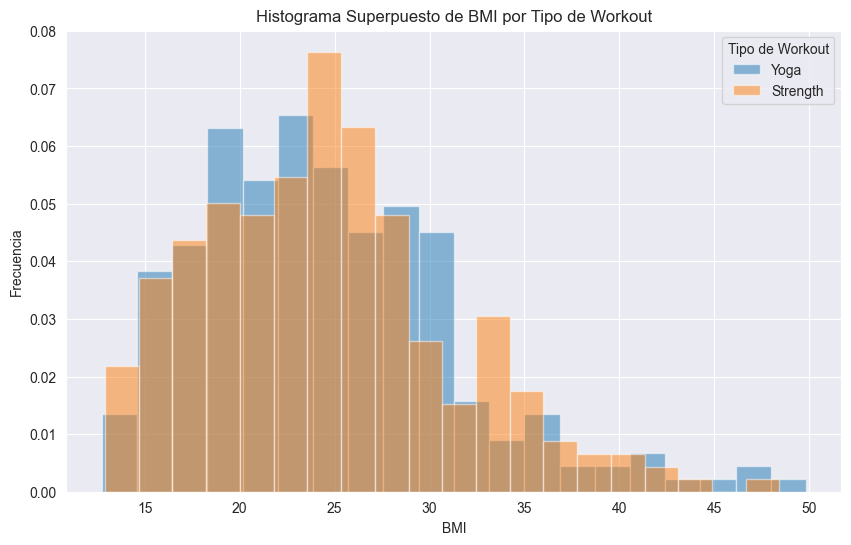

In [139]:
workout_types = ['Yoga', 'Strength']


plt.figure(figsize=(10, 6))

for workout in workout_types:
    workout_data = df[df['Workout_Type'] == workout]['BMI']
    plt.hist(workout_data, bins=20, alpha=0.5, label=workout, density=True)

plt.title('Histograma Superpuesto de BMI por Tipo de Workout')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Workout')
plt.grid(True)
plt.show()

# Análisis

Esta comparativa es interesante porque permite analizar cómo el Índice de Masa Corporal (BMI) varía entre personas que practican yoga y entrenamiento de fuerza, lo que puede ofrecer insights valiosos sobre los efectos de cada tipo de ejercicio en la composición corporal. En el histograma, se observa una gran superposición entre ambos grupos, lo que sugiere que, en general, las personas que practican yoga y entrenamiento de fuerza tienen distribuciones de BMI similares. Sin embargo, en la parte de mayor BMI, es decir, en los valores más altos de Índice de Masa Corporal, sobresalen las personas que realizan entrenamiento de fuerza ya que es un entrenamiento enfocado a este fin .

# Se puede concluir que las personas que entrenan fuerza tienen un IMB mayor que las que hacen yoga ?

U1 : Media de IBM de los que practican Yoga

U2 : Media de IMB de los que practican Fuerza

H0 : U1 <= U2

H1 : U2 >= U3

In [140]:
# Extraer los datos de BMI para los tipos de entrenamiento Yoga y Fuerza
yoga_bmi = df[df['Workout_Type'] == 'Yoga']['BMI']
fuerza_bmi = df[df['Workout_Type'] == 'Strength']['BMI']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_yoga = shapiro(yoga_bmi)
shapiro_fuerza = shapiro(fuerza_bmi)

# Imprimir los resultados de las pruebas de normalidad
print(f'Prueba de Shapiro-Wilk para BMI de Yoga: Estadístico={shapiro_yoga.statistic}, p-valor={shapiro_yoga.pvalue}')
print(f'Prueba de Shapiro-Wilk para BMI de Fuerza: Estadístico={shapiro_fuerza.statistic}, p-valor={shapiro_fuerza.pvalue}')

# Verificar si ambos conjuntos de datos son normalmente distribuidos
if shapiro_yoga.pvalue > 0.05 and shapiro_fuerza.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se puede realizar la prueba t.")
else:
    # Realizar la prueba de Mann-Whitney U
    estadistico_u, valor_p = mannwhitneyu(fuerza_bmi, yoga_bmi, alternative='greater')

    alfa = 0.05
    if valor_p < alfa:
        conclusion = "Rechazamos H0. Podemos concluir que las personas que entrenan fuerza tienen un BMI mayor que las que hacen yoga."
    else:
        conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que las personas que entrenan fuerza tienen un BMI mayor que las que hacen yoga."

    # Imprimir los resultados de la prueba de Mann-Whitney U
    print(f'Estadístico U: {estadistico_u}')
    print(f'Valor p: {valor_p}')
    print(conclusion)

Prueba de Shapiro-Wilk para BMI de Yoga: Estadístico=0.9492776393890381, p-valor=2.0990580651414348e-07
Prueba de Shapiro-Wilk para BMI de Fuerza: Estadístico=0.9706022143363953, p-valor=3.6758152418769896e-05
Estadístico U: 31069.5
Valor p: 0.44086359814088605
No hay prueba suficiente para rechazar H0. No podemos concluir que las personas que entrenan fuerza tienen un BMI mayor que las que hacen yoga.


# Se puede afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso ?

H0: mu >= 65

H1: mu < 65


In [141]:


# Extraer los datos de BPM en descanso para las personas que hacen cardio
cardio_df = df[df['Workout_Type'] == 'Cardio']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_test = shapiro(cardio_df['Resting_BPM'])

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para BPM en descanso de Cardio: Estadístico={shapiro_test.statistic}, p-valor={shapiro_test.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_test.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de una muestra.")
    # Realizar la prueba t de una muestra
    estadistico_t, valor_p = ttest_1samp(cardio_df['Resting_BPM'], 65, alternative='less')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Wilcoxon.")
    # Realizar la prueba de Wilcoxon
    estadistico_t, valor_p = wilcoxon(cardio_df['Resting_BPM'] - 65, alternative='less')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso."

# Imprimir los resultados
print(f'Media de BPM en descanso del grupo de cardio: {cardio_df["Resting_BPM"].mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

Prueba de Shapiro-Wilk para BPM en descanso de Cardio: Estadístico=0.9599593281745911, p-valor=1.5971467064446188e-06
Los datos no son normalmente distribuidos, se usará la prueba de Wilcoxon.
Media de BPM en descanso del grupo de cardio: 61.98823529411764
Estadístico: 8707.0
Valor p: 1.2847284413104345e-09
Rechazamos H0. Podemos afirmar que las personas que hacen cardio tienen menos de 65 BPM en descanso.


# Los hombres son más altos que las mujeres en promedio?

Prueba de Shapiro-Wilk para altura de hombres: Estadístico=0.9553492069244385, p-valor=2.5753236349013164e-11
Prueba de Shapiro-Wilk para altura de mujeres: Estadístico=0.9522631168365479, p-valor=4.604733608304379e-11
Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.
Media de Altura de Hombres: 1.7934050880626224
Media de Altura de Mujeres: 1.6442424242424243
Estadístico: 196688.5
Valor p: 1.6022311549525525e-72
Rechazamos H0. Podemos concluir que en media los hombres son más altos que las mujeres.


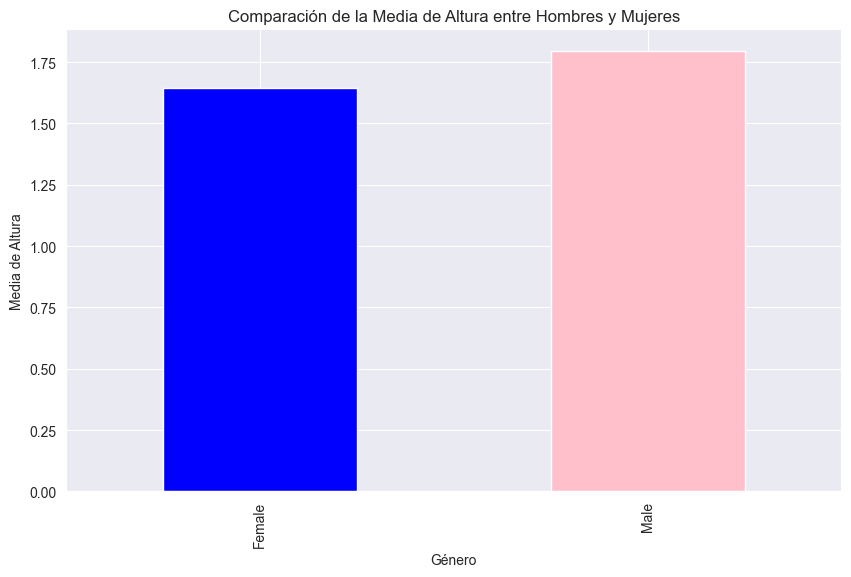

In [142]:
# Extraer los datos de altura para hombres y mujeres
altura_hombres = df[df['Gender'] == 'Male']['Height (m)']
altura_mujeres = df[df['Gender'] == 'Female']['Height (m)']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_hombres = shapiro(altura_hombres)
shapiro_mujeres = shapiro(altura_mujeres)

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para altura de hombres: Estadístico={shapiro_hombres.statistic}, p-valor={shapiro_hombres.pvalue}')
print(f'Prueba de Shapiro-Wilk para altura de mujeres: Estadístico={shapiro_mujeres.statistic}, p-valor={shapiro_mujeres.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_hombres.pvalue > 0.05 and shapiro_mujeres.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de dos muestras.")
    # Realizar la prueba t de dos muestras
    estadistico_t, valor_p = ttest_ind(altura_hombres, altura_mujeres, alternative='greater')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.")
    # Realizar la prueba de Mann-Whitney U
    estadistico_t, valor_p = mannwhitneyu(altura_hombres, altura_mujeres, alternative='greater')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que en media los hombres son más altos que las mujeres."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que en media los hombres son más altos que las mujeres."

# Imprimir los resultados
print(f'Media de Altura de Hombres: {altura_hombres.mean()}')
print(f'Media de Altura de Mujeres: {altura_mujeres.mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Gráfico de barras para la media de altura por género
mean_height_by_gender = df.groupby('Gender')['Height (m)'].mean()
plt.figure(figsize=(10, 6))
mean_height_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de la Media de Altura entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Media de Altura')
plt.show()

# Habrá una diferencia significativa en la media de edad entre hombres y mujeres?

Prueba de Shapiro-Wilk para edad de hombres: Estadístico=0.9529848694801331, p-valor=1.1107663400178325e-11
Prueba de Shapiro-Wilk para edad de mujeres: Estadístico=0.9469115138053894, p-valor=8.258867548183169e-12
Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.
Media de Edad de Hombres: 38.99804305283757
Media de Edad de Mujeres: 38.33549783549783
Estadístico: 121606.0
Valor p: 0.41533199251873576
No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres.


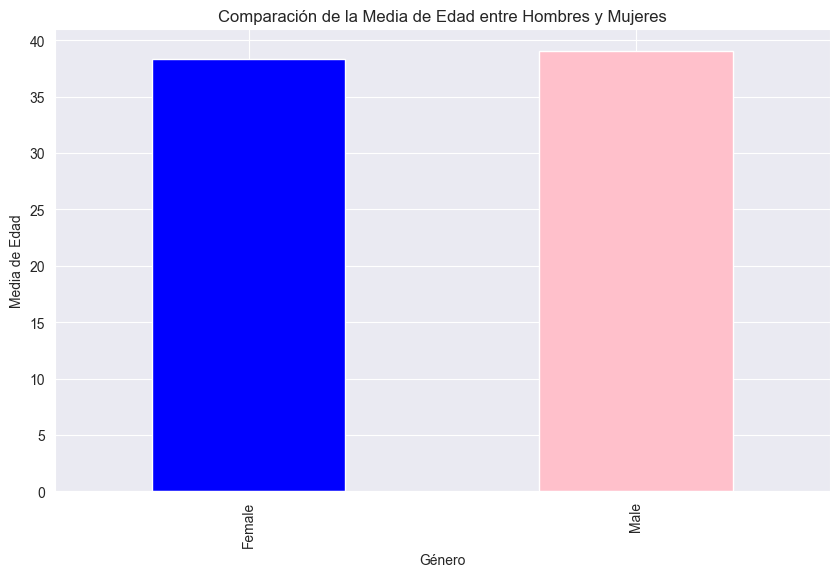

In [143]:
# Extraer los datos de edad para hombres y mujeres
edad_hombres = df[df['Gender'] == 'Male']['Age']
edad_mujeres = df[df['Gender'] == 'Female']['Age']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_hombres = shapiro(edad_hombres)
shapiro_mujeres = shapiro(edad_mujeres)

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para edad de hombres: Estadístico={shapiro_hombres.statistic}, p-valor={shapiro_hombres.pvalue}')
print(f'Prueba de Shapiro-Wilk para edad de mujeres: Estadístico={shapiro_mujeres.statistic}, p-valor={shapiro_mujeres.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_hombres.pvalue > 0.05 and shapiro_mujeres.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de dos muestras.")
    # Realizar la prueba t de dos muestras
    estadistico_t, valor_p = ttest_ind(edad_hombres, edad_mujeres, alternative='two-sided')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.")
    # Realizar la prueba de Mann-Whitney U
    estadistico_t, valor_p = mannwhitneyu(edad_hombres, edad_mujeres, alternative='two-sided')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres."

# Imprimir los resultados
print(f'Media de Edad de Hombres: {edad_hombres.mean()}')
print(f'Media de Edad de Mujeres: {edad_mujeres.mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Crear el gráfico de barras para comparar la media de edad entre hombres y mujeres
mean_age_by_gender = df.groupby('Gender')['Age'].mean()
plt.figure(figsize=(10, 6))
mean_age_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de la Media de Edad entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Media de Edad')
plt.show()

# Se puede afirmar que hay una diferencia significativa en las calorías quemadas entre las personas que tienen un porcentaje de grasa mayor al 30% y las que tienen un 30% o menos?

Prueba de Shapiro-Wilk para calorías quemadas (>30% fat): Estadístico=0.9804379343986511, p-valor=0.00871124304831028
Prueba de Shapiro-Wilk para calorías quemadas (<=30% fat): Estadístico=0.9938428997993469, p-valor=0.0027677020989358425
Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.
Media de Calorías Quemadas (>30% fat): 785.0364583333334
Media de Calorías Quemadas (<=30% fat): 935.0179257362356
Estadístico: 50960.0
Valor p: 5.828088726793975e-12
Rechazamos H0. Podemos concluir que hay una diferencia significativa en las calorías quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos.


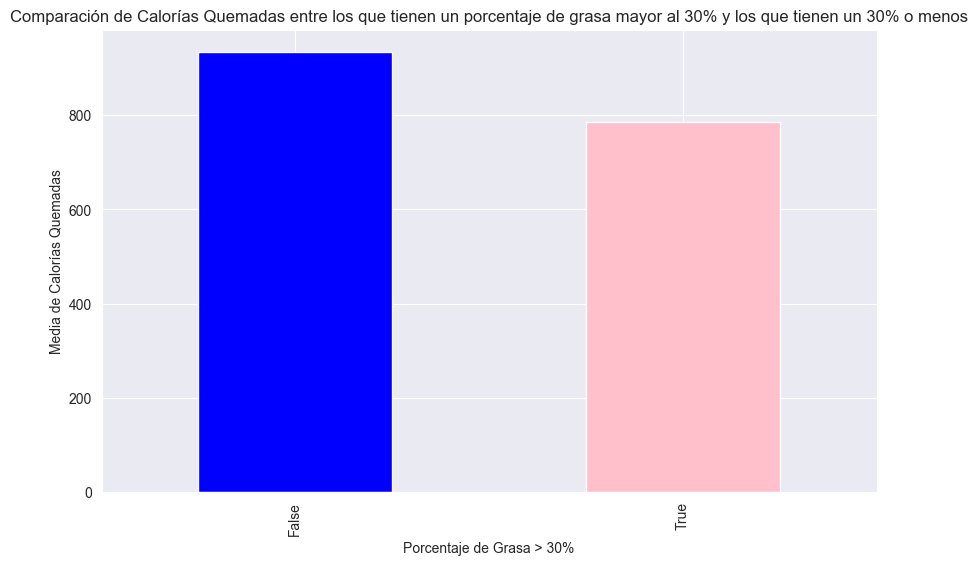

In [144]:
# Extraer los datos de calorías quemadas para los dos grupos
calorias_mas_30_fat = df[df['Fat_Percentage'] > 30]['Calories_Burned']
calorias_menos_30_fat = df[df['Fat_Percentage'] <= 30]['Calories_Burned']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_mas_30 = shapiro(calorias_mas_30_fat)
shapiro_menos_30 = shapiro(calorias_menos_30_fat)

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para calorías quemadas (>30% fat): Estadístico={shapiro_mas_30.statistic}, p-valor={shapiro_mas_30.pvalue}')
print(f'Prueba de Shapiro-Wilk para calorías quemadas (<=30% fat): Estadístico={shapiro_menos_30.statistic}, p-valor={shapiro_menos_30.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_mas_30.pvalue > 0.05 and shapiro_menos_30.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de dos muestras.")
    # Realizar la prueba t de dos muestras
    estadistico_t, valor_p = ttest_ind(calorias_mas_30_fat, calorias_menos_30_fat, alternative='two-sided')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.")
    # Realizar la prueba de Mann-Whitney U
    estadistico_t, valor_p = mannwhitneyu(calorias_mas_30_fat, calorias_menos_30_fat, alternative='two-sided')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en las calorías quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en las calorías quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."

# Imprimir los resultados
print(f'Media de Calorías Quemadas (>30% fat): {calorias_mas_30_fat.mean()}')
print(f'Media de Calorías Quemadas (<=30% fat): {calorias_menos_30_fat.mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Crear el gráfico de barras para comparar la media de calorías quemadas entre los dos grupos
mean_calories_by_fat = df.groupby(df['Fat_Percentage'] > 30)['Calories_Burned'].mean()
plt.figure(figsize=(10, 6))
mean_calories_by_fat.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Calorías Quemadas entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos')
plt.xlabel('Porcentaje de Grasa > 30%')
plt.ylabel('Media de Calorías Quemadas')
plt.show()

# Se puede afirmar que hay una diferencia significativa en el consumo de agua entre las personas que tienen un porcentaje de grasa mayor al 30% y las que tienen 30% o menos?

Prueba de Shapiro-Wilk para consumo de agua (>30% fat): Estadístico=0.9594311714172363, p-valor=2.5341183572891168e-05
Prueba de Shapiro-Wilk para consumo de agua (<=30% fat): Estadístico=0.9504806995391846, p-valor=1.5843433641036467e-15
Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.
Media de Consumo de Agua (>30% fat): 2.0963541666666665
Media de Consumo de Agua (<=30% fat): 2.7569782330345713
Estadístico: 26059.5
Valor p: 6.704389997998315e-45
Rechazamos H0. Podemos concluir que hay una diferencia significativa en el consumo de agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos.


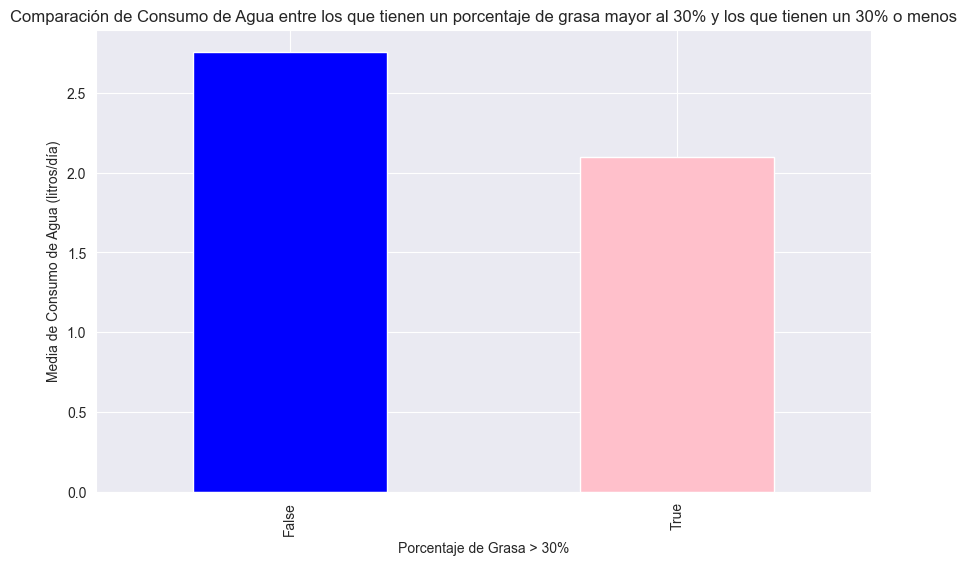

In [145]:
# Extraer los datos de consumo de agua para los dos grupos
agua_mas_30_fat = df[df['Fat_Percentage'] > 30]['Water_Intake (liters)']
agua_menos_30_fat = df[df['Fat_Percentage'] <= 30]['Water_Intake (liters)']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_mas_30 = shapiro(agua_mas_30_fat)
shapiro_menos_30 = shapiro(agua_menos_30_fat)

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para consumo de agua (>30% fat): Estadístico={shapiro_mas_30.statistic}, p-valor={shapiro_mas_30.pvalue}')
print(f'Prueba de Shapiro-Wilk para consumo de agua (<=30% fat): Estadístico={shapiro_menos_30.statistic}, p-valor={shapiro_menos_30.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_mas_30.pvalue > 0.05 and shapiro_menos_30.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de dos muestras.")
    # Realizar la prueba t de dos muestras
    estadistico_t, valor_p = ttest_ind(agua_mas_30_fat, agua_menos_30_fat, alternative='two-sided')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.")
    # Realizar la prueba de Mann-Whitney U
    estadistico_t, valor_p = mannwhitneyu(agua_mas_30_fat, agua_menos_30_fat, alternative='two-sided')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en el consumo de agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en el consumo de agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos."

# Imprimir los resultados
print(f'Media de Consumo de Agua (>30% fat): {agua_mas_30_fat.mean()}')
print(f'Media de Consumo de Agua (<=30% fat): {agua_menos_30_fat.mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Crear el gráfico de barras para comparar la media de consumo de agua entre los dos grupos
mean_water_by_fat = df.groupby(df['Fat_Percentage'] > 30)['Water_Intake (liters)'].mean()
plt.figure(figsize=(10, 6))
mean_water_by_fat.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Consumo de Agua entre los que tienen un porcentaje de grasa mayor al 30% y los que tienen un 30% o menos')
plt.xlabel('Porcentaje de Grasa > 30%')
plt.ylabel('Media de Consumo de Agua (litros/día)')
plt.show()

# Se puede afirmar que hay una diferencia significativa en la cantidad de agua consumida entre las personas que hacen yoga y las que no?

Prueba de Shapiro-Wilk para consumo de agua (Yoga): Estadístico=0.9597405791282654, p-valor=3.042123353225179e-06
Prueba de Shapiro-Wilk para consumo de agua (No Yoga): Estadístico=0.9518263339996338, p-valor=9.430950385057053e-15
Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.
Media de Consumo de Agua (Yoga): 2.6422594142259412
Media de Consumo de Agua (No Yoga): 2.621525885558583
Estadístico: 90110.5
Valor p: 0.7380179048284684
No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen yoga consumen menos agua que los que no hacen yoga.


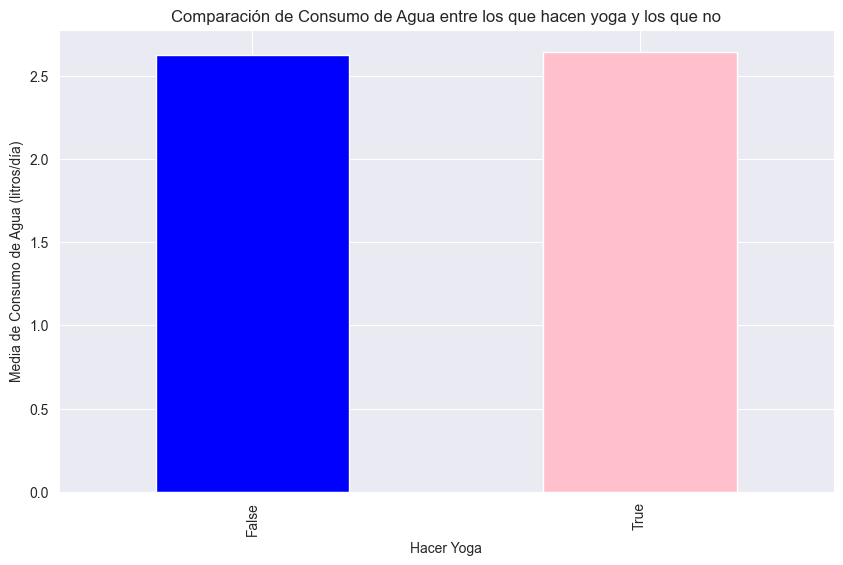

In [146]:
# Extraer los datos de consumo de agua para los dos grupos
agua_yoga = df[df['Workout_Type'] == 'Yoga']['Water_Intake (liters)']
agua_no_yoga = df[df['Workout_Type'] != 'Yoga']['Water_Intake (liters)']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_yoga = shapiro(agua_yoga)
shapiro_no_yoga = shapiro(agua_no_yoga)

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para consumo de agua (Yoga): Estadístico={shapiro_yoga.statistic}, p-valor={shapiro_yoga.pvalue}')
print(f'Prueba de Shapiro-Wilk para consumo de agua (No Yoga): Estadístico={shapiro_no_yoga.statistic}, p-valor={shapiro_no_yoga.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_yoga.pvalue > 0.05 and shapiro_no_yoga.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de dos muestras.")
    # Realizar la prueba t de dos muestras
    estadistico_t, valor_p = ttest_ind(agua_yoga, agua_no_yoga, alternative='less')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.")
    # Realizar la prueba de Mann-Whitney U
    estadistico_t, valor_p = mannwhitneyu(agua_yoga, agua_no_yoga, alternative='less')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que los que hacen yoga consumen menos agua que los que no hacen yoga."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen yoga consumen menos agua que los que no hacen yoga."

# Imprimir los resultados
print(f'Media de Consumo de Agua (Yoga): {agua_yoga.mean()}')
print(f'Media de Consumo de Agua (No Yoga): {agua_no_yoga.mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Crear el gráfico de barras para comparar la media de consumo de agua entre los dos grupos
mean_water_by_workout = df.groupby(df['Workout_Type'] == 'Yoga')['Water_Intake (liters)'].mean()
plt.figure(figsize=(10, 6))
mean_water_by_workout.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Consumo de Agua entre los que hacen yoga y los que no')
plt.xlabel('Hacer Yoga')
plt.ylabel('Media de Consumo de Agua (litros/día)')
plt.show()

# Se puede afirmar que hay una diferencia significativa en la media de pulsaciones por minuto entre las personas que hacen ejercicios de fuerza y las que hacen yoga?

Prueba de Shapiro-Wilk para Avg_BPM de Strength: Estadístico=0.9381642937660217, p-valor=6.087157444767399e-09
Prueba de Shapiro-Wilk para Avg_BPM de Yoga: Estadístico=0.9543944001197815, p-valor=7.438014790750458e-07
Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.
Media de Avg_BPM (Strength): 144.3139534883721
Media de Avg_BPM (Yoga): 143.26778242677824
Estadístico: 31954.5
Valor p: 0.24128374898460392
No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen ejercicios de fuerza tienen un Avg_BPM más alto que los que hacen yoga.


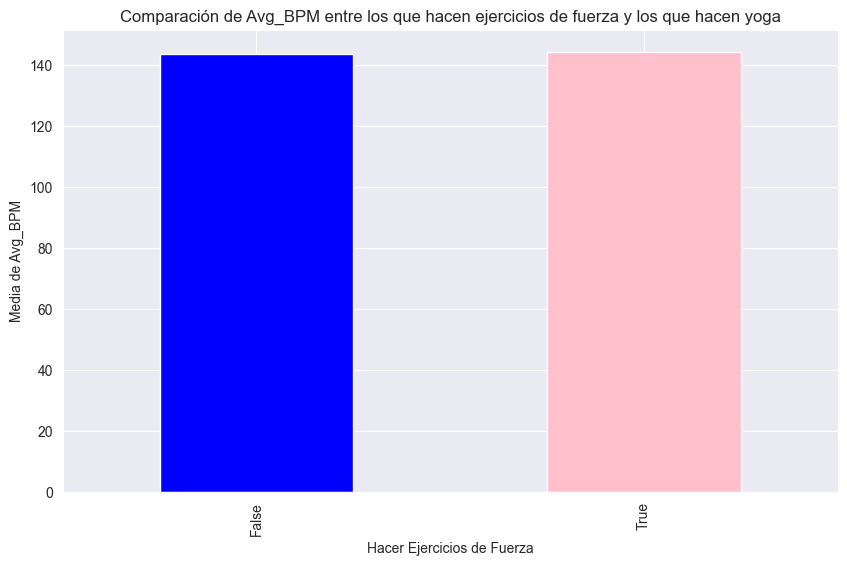

In [147]:
# Extraer los datos de Avg_BPM para los dos grupos
bpm_strength = df[df['Workout_Type'] == 'Strength']['Avg_BPM']
bpm_yoga = df[df['Workout_Type'] == 'Yoga']['Avg_BPM']

# Realizar la prueba de Shapiro-Wilk para normalidad
shapiro_strength = shapiro(bpm_strength)
shapiro_yoga = shapiro(bpm_yoga)

# Imprimir los resultados de la prueba de Shapiro-Wilk
print(f'Prueba de Shapiro-Wilk para Avg_BPM de Strength: Estadístico={shapiro_strength.statistic}, p-valor={shapiro_strength.pvalue}')
print(f'Prueba de Shapiro-Wilk para Avg_BPM de Yoga: Estadístico={shapiro_yoga.statistic}, p-valor={shapiro_yoga.pvalue}')

# Verificar si los datos son normalmente distribuidos
if shapiro_strength.pvalue > 0.05 and shapiro_yoga.pvalue > 0.05:
    print("Los datos son normalmente distribuidos, se usará la prueba t de dos muestras.")
    # Realizar la prueba t de dos muestras
    estadistico_t, valor_p = ttest_ind(bpm_strength, bpm_yoga, alternative='greater')
else:
    print("Los datos no son normalmente distribuidos, se usará la prueba de Mann-Whitney U.")
    # Realizar la prueba de Mann-Whitney U
    estadistico_t, valor_p = mannwhitneyu(bpm_strength, bpm_yoga, alternative='greater')

# Nivel de significancia
alfa = 0.05

# Conclusión basada en el valor p
if valor_p < alfa:
    conclusion = "Rechazamos H0. Podemos concluir que los que hacen ejercicios de fuerza tienen un Avg_BPM más alto que los que hacen yoga."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que los que hacen ejercicios de fuerza tienen un Avg_BPM más alto que los que hacen yoga."

# Imprimir los resultados
print(f'Media de Avg_BPM (Strength): {bpm_strength.mean()}')
print(f'Media de Avg_BPM (Yoga): {bpm_yoga.mean()}')
print(f'Estadístico: {estadistico_t}')
print(f'Valor p: {valor_p}')
print(conclusion)

# Crear el gráfico de barras para comparar la media de Avg_BPM entre los dos grupos
mean_bpm_by_workout = df.groupby(df['Workout_Type'] == 'Strength')['Avg_BPM'].mean()
plt.figure(figsize=(10, 6))
mean_bpm_by_workout.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparación de Avg_BPM entre los que hacen ejercicios de fuerza y los que hacen yoga')
plt.xlabel('Hacer Ejercicios de Fuerza')
plt.ylabel('Media de Avg_BPM')
plt.show()

# Se puede afirmar que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio?

Coeficiente de correlación: 0.5761501254548647
Valor p: 0.000854127292880474
Rechazamos H0. Podemos concluir que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio.


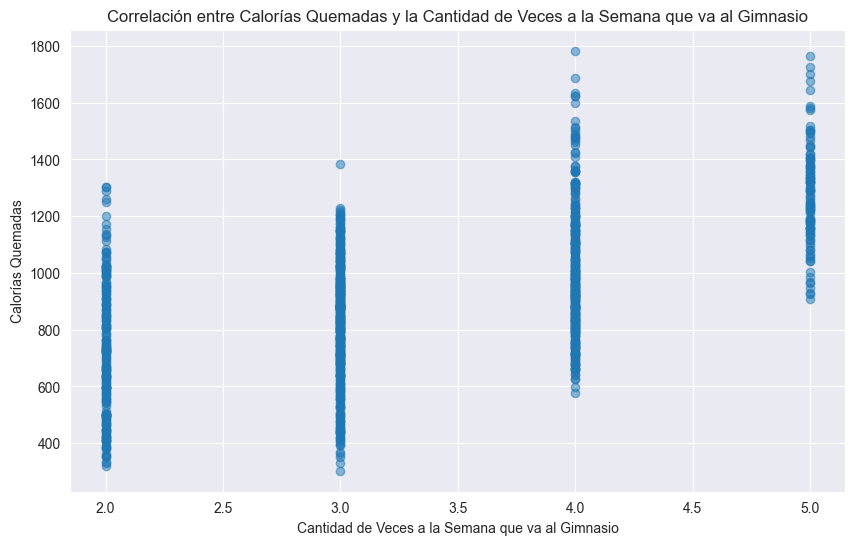

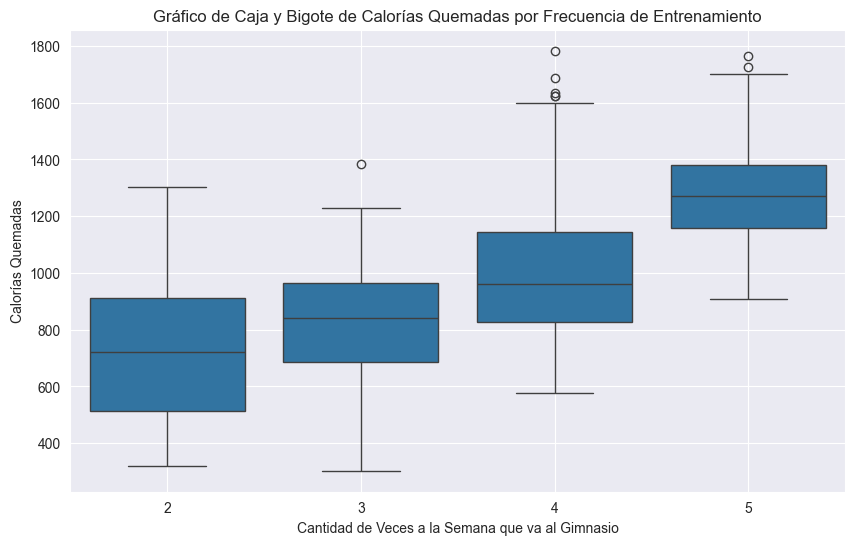

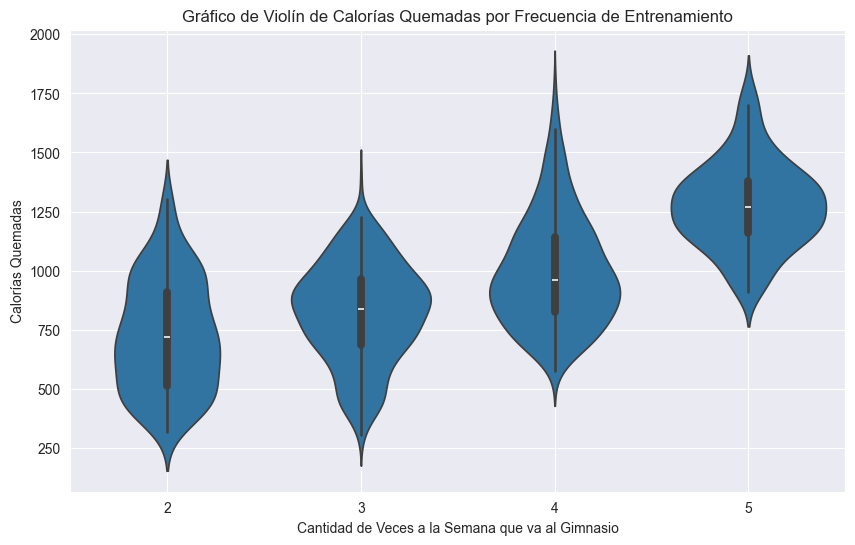

In [148]:
# Coeficiente de correlación de Pearson
correlation_coefficient, _ = stats.pearsonr(df['Calories_Burned'], df['Workout_Frequency (days/week)'])

# Tabla de contingencia para la prueba Chi-Cuadrado de Independencia
contingency_table = pd.crosstab(df['Calories_Burned'], df['Workout_Frequency (days/week)'])

# Prueba Chi-Cuadrado de Independencia
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una correlación significativa entre las calorías quemadas y la cantidad de veces a la semana que va al gimnasio."

print(f'Coeficiente de correlación: {correlation_coefficient}')
print(f'Valor p: {p_value}')
print(conclusion)

plt.figure(figsize=(10, 6))
plt.scatter(df['Workout_Frequency (days/week)'], df['Calories_Burned'], alpha=0.5)
plt.title('Correlación entre Calorías Quemadas y la Cantidad de Veces a la Semana que va al Gimnasio')
plt.xlabel('Cantidad de Veces a la Semana que va al Gimnasio')
plt.ylabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# Gráfico de caja y bigote
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df)
plt.title('Gráfico de Caja y Bigote de Calorías Quemadas por Frecuencia de Entrenamiento')
plt.xlabel('Cantidad de Veces a la Semana que va al Gimnasio')
plt.ylabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df)
plt.title('Gráfico de Violín de Calorías Quemadas por Frecuencia de Entrenamiento')
plt.xlabel('Cantidad de Veces a la Semana que va al Gimnasio')
plt.ylabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# Se puede afirmar que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones?

Coeficiente de correlación: 0.7647681188532216
Valor p: 4.277478776351479e-135
Rechazamos H0. Podemos concluir que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones.


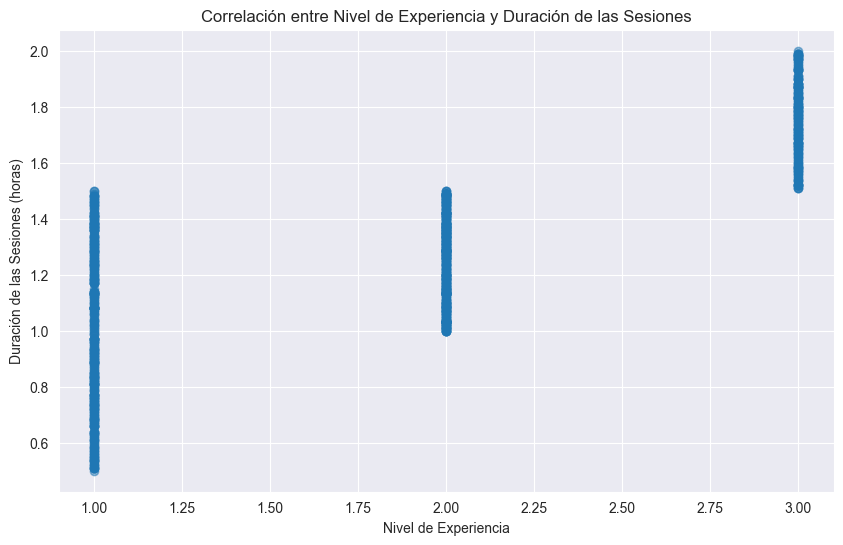

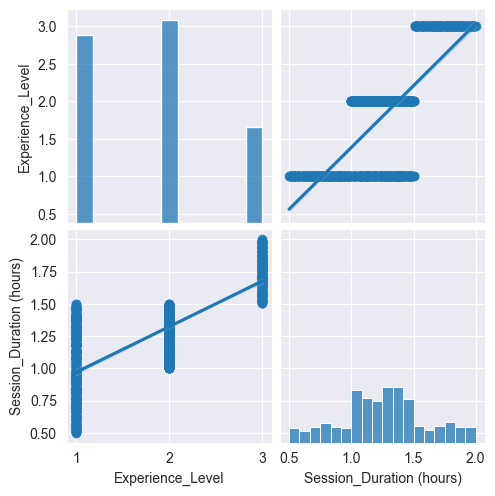

In [149]:
# Coeficiente de correlación de Pearson
correlation_coefficient, _ = stats.pearsonr(df['Experience_Level'], df['Session_Duration (hours)'])

# Tabla de contingencia para la prueba Chi-Cuadrado de Independencia
contingency_table = pd.crosstab(df['Experience_Level'], df['Session_Duration (hours)'])

# Prueba Chi-Cuadrado de Independencia
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una correlación significativa entre el nivel de experiencia y la duración de las sesiones."

print(f'Coeficiente de correlación: {correlation_coefficient}')
print(f'Valor p: {p_value}')
print(conclusion)

plt.figure(figsize=(10, 6))
plt.scatter(df['Experience_Level'], df['Session_Duration (hours)'], alpha=0.5)
plt.title('Correlación entre Nivel de Experiencia y Duración de las Sesiones')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Duración de las Sesiones (horas)')
plt.grid(True)
plt.show()

# Pair plot para comparar correlación
sns.pairplot(df, vars=['Experience_Level', 'Session_Duration (hours)'], kind='reg')
plt.show()

# Prueba de Levene para comparar las varianzas entre el grupo de personas con más de 30% de grasa corporal y las que tienen 30% o menos

H0: No hay una diferencia significativa en las varianzas de los dos grupos.

H1: Hay una diferencia significativa en las varianzas de los dos grupos.

Estadístico de Levene: 142.5422467743993
P-value: 9.342111564132657e-31
Rechazamos H0. Podemos concluir que hay una diferencia significativa en las varianzas de los dos grupos.


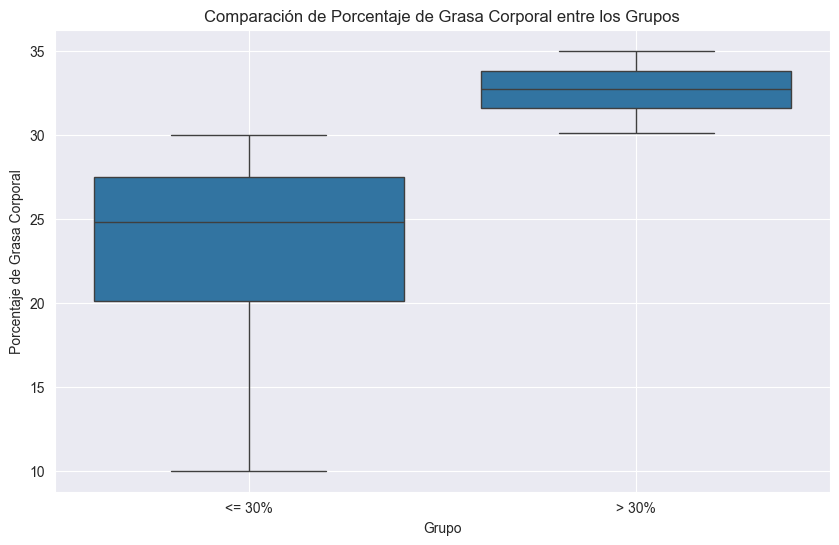

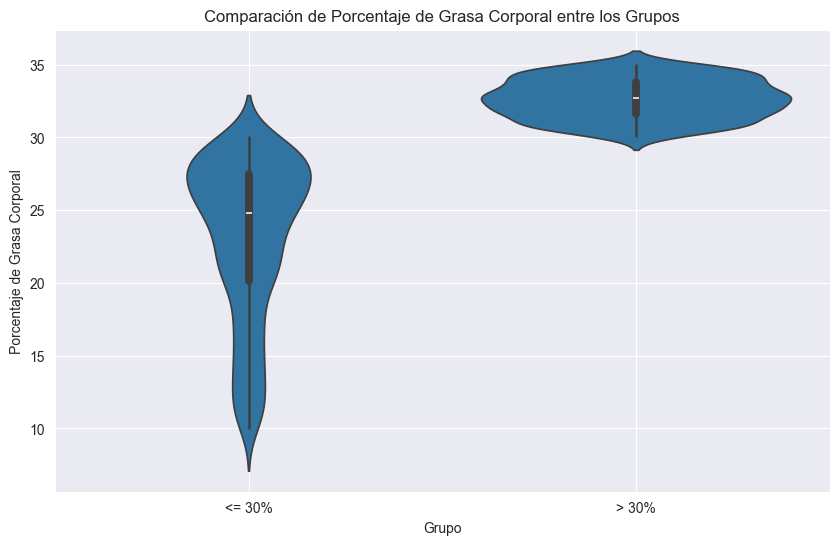

In [150]:
alpha = 0.05

fat_greater_30 = df[df['Fat_Percentage'] > 30]['Fat_Percentage']
fat_less_equal_30 = df[df['Fat_Percentage'] <= 30]['Fat_Percentage']

statistic, p_value = stats.levene(fat_greater_30, fat_less_equal_30)

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en las varianzas de los dos grupos."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en las varianzas de los dos grupos."

print("Estadístico de Levene:", statistic)
print("P-value:", p_value)
print(conclusion)


# Crear un DataFrame con los dos grupos
df_fat = df[['Fat_Percentage']].copy()
df_fat['Group'] = np.where(df['Fat_Percentage'] > 30, '> 30%', '<= 30%')

# Gráfico de caja y bigote
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Fat_Percentage', data=df_fat)
plt.title('Comparación de Porcentaje de Grasa Corporal entre los Grupos')
plt.xlabel('Grupo')
plt.ylabel('Porcentaje de Grasa Corporal')
plt.grid(True)
plt.show()

# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Fat_Percentage', data=df_fat)
plt.title('Comparación de Porcentaje de Grasa Corporal entre los Grupos')
plt.xlabel('Grupo')
plt.ylabel('Porcentaje de Grasa Corporal')
plt.grid(True)
plt.show()

# Prueba Kolmogorov-Smirnov para comparar la distribución de BMI con una distribución normal
 H0: La distribución de BMI no sigue una distribución normal.
 
 H1: La distribución de BMI sigue una distribución normal.



KS Statistic: 0.05620385713516651
P-value: 0.004109560807314723
Rechazamos H0. Podemos concluir que la distribución de BMI sigue una distribución normal.


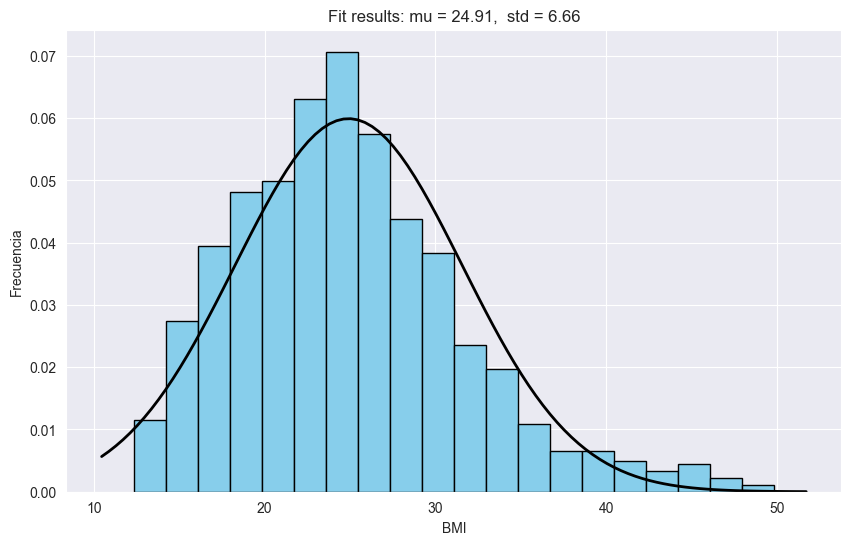

In [151]:
alpha = 0.05

data = df['BMI']

statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que la distribución de BMI sigue una distribución normal."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que la distribución de BMI sigue una distribución normal."

print("KS Statistic:", statistic)
print("P-value:", p_value)
print(conclusion)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Histograma de la variable BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.grid(True)

mu, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Comparación de la Media de Duración de Entrenamiento entre Hombres y Mujeres con Prueba T

H0: No hay diferencia significativa en la duración de entrenamiento entre hombres y mujeres (media_hombres = media_mujeres)

 H1: Hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres (media_hombres ≠ media_mujeres)


In [152]:

df = pd.read_csv('gym_members_exercise_tracking.csv')

# Definir las variables duracion_hombres y duracion_mujeres
duracion_hombres = df[df['Gender'] == 'Male']['Session_Duration (hours)']
duracion_mujeres = df[df['Gender'] == 'Female']['Session_Duration (hours)']

# Calcular las medias de duración de entrenamiento para hombres y mujeres
mean_duration_hombres = duracion_hombres.mean()
mean_duration_mujeres = duracion_mujeres.mean()

# Prueba t para comparar las medias de duración de entrenamiento entre hombres y mujeres
alpha = 0.05
statistic, p_value = stats.ttest_ind(duracion_hombres, duracion_mujeres, equal_var=True)

if p_value < alpha:
    conclusion = "Rechazamos H0. Podemos concluir que hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres."
else:
    conclusion = "No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres."

print("Estadístico t:", statistic)
print("P-value:", p_value)
print(conclusion)

Estadístico t: -0.380190210019468
P-value: 0.7038873724084256
No hay prueba suficiente para rechazar H0. No podemos concluir que hay una diferencia significativa en la duración de entrenamiento entre hombres y mujeres.


# Modelo de regresión lineal simple

In [153]:
# Seleccionar las variables independientes y dependientes
X = df[['Experience_Level']]
y = df['Session_Duration (hours)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustar el modelo de regresión lineal simple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Resumen del modelo usando statsmodels
X_train_sm = sm.add_constant(X_train)  # Agregar constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

Mean Squared Error: 0.05070176893547997
R^2 Score: 0.5743095690737392
                               OLS Regression Results                               
Dep. Variable:     Session_Duration (hours)   R-squared:                       0.587
Model:                                  OLS   Adj. R-squared:                  0.587
Method:                       Least Squares   F-statistic:                     1104.
Date:                      Tue, 11 Feb 2025   Prob (F-statistic):          2.78e-151
Time:                              11:40:29   Log-Likelihood:                 74.614
No. Observations:                       778   AIC:                            -145.2
Df Residuals:                           776   BIC:                            -135.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.

#  Linealidad 

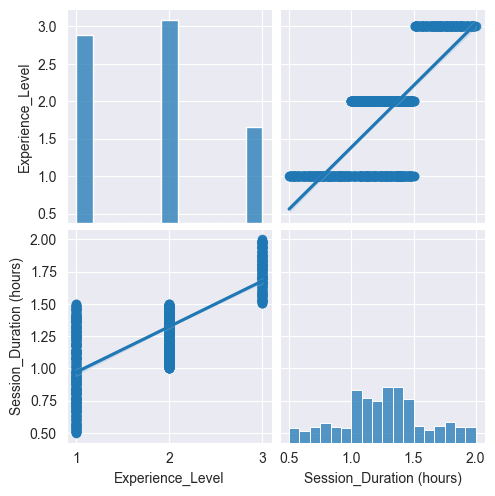

In [154]:
# Visualización de la relación entre las variables
sns.pairplot(df[['Experience_Level', 'Session_Duration (hours)']], kind='reg')
plt.show()

# Normalidad de los residuos

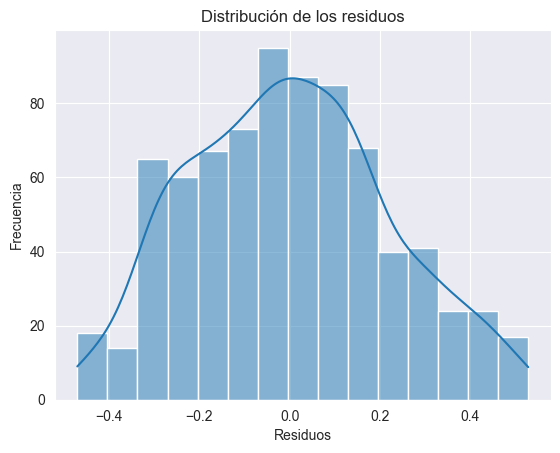

In [155]:
# Normalidad de los residuos
residuals = y_train - model_sm.predict(X_train_sm)
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Test de normalidad de Shapiro-Wilk

In [156]:
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: {shapiro_test}')

Shapiro-Wilk Test: ShapiroResult(statistic=0.9879363179206848, pvalue=5.087578756501898e-06)


 Dado que el valor p es mucho menor que 0.05, se rechaza la hipótesis nula. Esto sugiere que los residuos no siguen una distribución normal.

# Homocedasticidad
La varianza de los errores debe ser constante a lo largo de todos los niveles de las variables independientes.

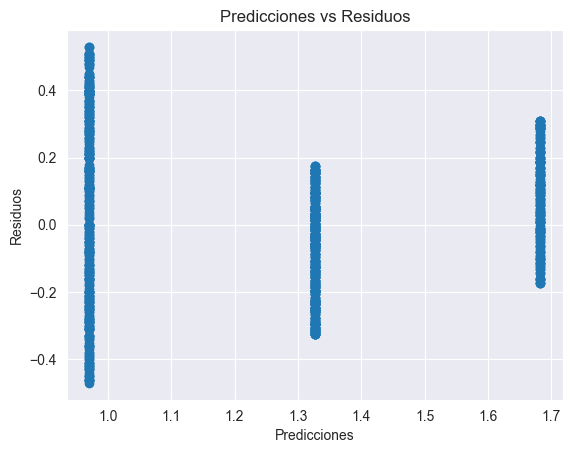

In [157]:
plt.scatter(model_sm.predict(X_train_sm), residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Predicciones vs Residuos')
plt.show()

# Test de Breusch-Pagan

In [158]:
# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X_train_sm)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_test_results = dict(zip(labels, bp_test))

# Imprimir los resultados del test de Breusch-Pagan
print('Breusch-Pagan Test:')
for key, value in bp_test_results.items():
    print(f'{key}: {value}')

Breusch-Pagan Test:
LM Statistic: 131.6045975554168
LM-Test p-value: 1.8259536009764625e-30
F-Statistic: 157.99179158264337
F-Test p-value: 4.104539377062572e-33


# Predicciones de nuevos Niveles de Experiencia 

In [159]:
# Crear un DataFrame con nuevos datos de nivel de experiencia
new_data = pd.DataFrame({'Experience_Level': [1.5, 2.5]})

# Realizar predicciones con el modelo ajustado
new_predictions = model.predict(new_data)

# Mostrar las predicciones de manera más clara
for level, prediction in zip(new_data['Experience_Level'], new_predictions):
    print(f'Para un nivel de experiencia de {level}, la duración de la sesión predicha es {prediction:.2f} horas.')

Para un nivel de experiencia de 1.5, la duración de la sesión predicha es 1.15 horas.
Para un nivel de experiencia de 2.5, la duración de la sesión predicha es 1.50 horas.
